In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
%matplotlib inline

data = pd.read_csv('/Users/Suki/Desktop/Zeiss/New Customer.csv')

In [17]:
data.head()

,Customer_Purchase_History,Sales_Level,Purchase_Number,Salary,Marketing_Time,Alternative,Discount,Marketing_Channel,Brand_Review,Awareness
0,0.12,1.00,3,2780,2.5,0,0,Mail,medium,1
1,0.10,0.77,7,2500,3.0,0,0,Mail,medium,1
2,0.37,0.55,2,1270,2.0,0,0,Mail,medium,1
3,0.89,0.87,5,2550,3.0,0,0,Mail,medium,1
4,0.45,0.47,2,1350,2.0,0,0,Mail,medium,1


In [18]:
from sklearn.cluster import KMeans
kmeans_df =  data[data.Awareness == 1].drop([ u'Purchase_Number',
       u'Salary', u'Marketing_Time', u'Alternative',
       u'Awareness', u'Discount', u'Marketing_Channel', u'Brand_Review'],axis = 1)
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
kmeans.cluster_centers_

array([[ 0.41026746,  0.51714925],
       [ 0.80855299,  0.9118795 ],
       [ 0.11124209,  0.86985225]])

# But for those who left - there are very clear 3 clusters:
The happy and appreciated. why would they leave? I called them, somewhat jokingly, "Winners" - those who leave because they were offered a better opportunity.

The appreciated but unhappy - Maybe they are over qualified for the job. I called them the "Frustrated"

The unappreciated and unhappy - It is not surprising that these would leave, possibly even fired. they are simply a "Bad Match"

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


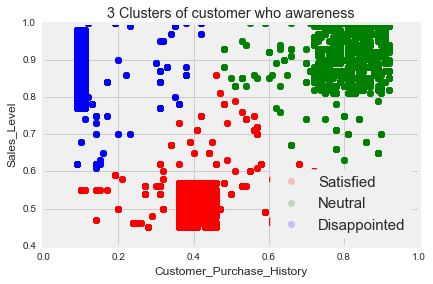

In [19]:
left = data[data.Awareness == 1]
left['label'] = kmeans.labels_
plt.figure()
plt.xlabel('Customer_Purchase_History')
plt.ylabel('Sales_Level')
plt.title('3 Clusters of customer who awareness')
plt.plot(left.Customer_Purchase_History[left.label==0],left.Sales_Level[left.label==0],'o', alpha = 0.2, color = 'r')
plt.plot(left.Customer_Purchase_History[left.label==1],left.Sales_Level[left.label==1],'o', alpha = 0.2, color = 'g')
plt.plot(left.Customer_Purchase_History[left.label==2],left.Sales_Level[left.label==2],'o', alpha = 0.2, color = 'b')
plt.legend(['Satisfied','Neutral','Disappointed'], loc = 4, fontsize = 15,frameon=True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


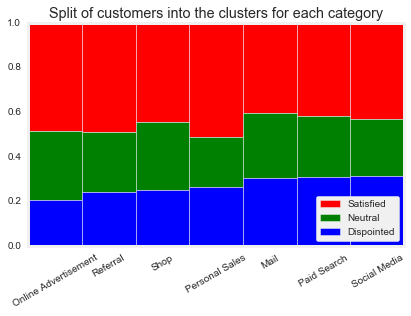

In [20]:
Satisfied_hours_std = np.std(left.Salary[left.label == 0])
Neutral_hours_std = np.std(left.Salary[left.label == 1])
Dispointed_hours_std = np.std(left.Salary[left.label == 2])
Satisfied = left[left.label ==0]
Neutral = left[left.label == 1]
Dispointed = left[left.label == 2]

def get_pct(df1,df2, value_list,feature):
    pct = []
    for value in value_list:
        pct.append(np.true_divide(len(df1[df1[feature] == value]),len(df2[df2[feature] == value])))
    return pct
columns = ['Application','Satisfied','Dispointed','Neutral']
Satisfied_list = get_pct(Satisfied,left,np.unique(left.Marketing_Channel),'Marketing_Channel')
Neutral_list = get_pct(Neutral,left,np.unique(left.Marketing_Channel),'Marketing_Channel')
Dispointed_list = get_pct(Dispointed,left,np.unique(left.Marketing_Channel),'Marketing_Channel')
plot_df = pd.DataFrame(columns = columns)
plot_df['Marketing_Channel'] = np.unique(left.Marketing_Channel)
plot_df['Satisfied'] = Satisfied_list
plot_df['Dispointed'] = Dispointed_list
plot_df['Neutral'] =Neutral_list
plot_df = plot_df.sort(columns = 'Dispointed')



plt.figure()
values = np.unique(left.Marketing_Channel)
plt.bar(range(len(values)),plot_df.Satisfied,width = 1, color = 'r',bottom=plot_df.Dispointed + plot_df.Neutral)
plt.bar(range(len(values)),plot_df.Neutral, width = 1, color = 'g',bottom=plot_df.Dispointed)
plt.bar(range(len(values)),plot_df.Dispointed, width = 1, color = 'b')
plt.xticks(range(len(values))+ 0.5*np.ones(len(values)),plot_df.Marketing_Channel, rotation= 30)
plt.legend(['Satisfied','Neutral','Dispointed'], loc = 4,frameon=True)

plt.title('Split of customers into the clusters for each category')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


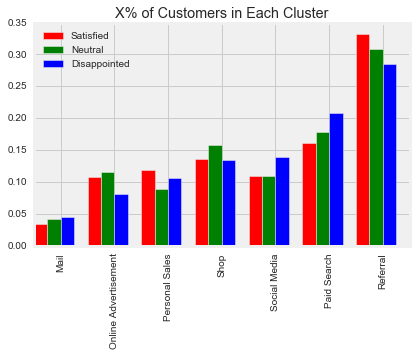

In [22]:
def get_num(df,value_list,feature):
    out = []
    for val in value_list:
        out.append(np.true_divide(len(df[df[feature] == val]),len(df)))
    return out

Satisfied_list = get_num(Satisfied,np.unique(left.Marketing_Channel),'Marketing_Channel')
Neutral_list = get_num(Neutral,np.unique(left.Marketing_Channel),'Marketing_Channel')
Dispointed_list = get_num(Dispointed,np.unique(left.Marketing_Channel),'Marketing_Channel')
plot_df = pd.DataFrame(columns = columns)
plot_df['Marketing_Channel'] = np.unique(left.Marketing_Channel)
plot_df['Satisfied'] = Satisfied_list
plot_df['Dispointed'] = Dispointed_list
plot_df['Neutral'] = Neutral_list
plot_df = plot_df.sort(columns = 'Dispointed')

plt.figure()
values = np.unique(left.Marketing_Channel)
plt.bar(range(len(values)),plot_df.Satisfied,width = 0.25, color = 'r')
plt.bar(range(len(values))+0.25*np.ones(len(values)),plot_df.Neutral, width = 0.25, color = 'g')
plt.bar(range(len(values))+0.5*np.ones(len(values)),plot_df.Dispointed, width = 0.25, color = 'b')
plt.xticks(range(len(values))+ 0.5*np.ones(len(values)),plot_df.Marketing_Channel, rotation= 90)
plt.legend(['Satisfied','Neutral','Disappointed'], loc = 2)

plt.title('X% of Customers in Each Cluster')

([<matplotlib.axis.XTick at 0x11a40d390>,
 <a list of 3 Text xticklabel objects>)

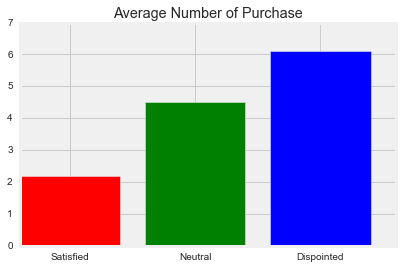

In [10]:
plt.figure()
plt.bar(0,np.mean(Satisfied.Purchase_Number), color = 'r')
plt.bar(1,np.mean(Neutral.Purchase_Number), color = 'g')
plt.bar(2,np.mean(Dispointed.Purchase_Number), color = 'b')
plt.title('Average Number of Purchase')
plt.xticks([0.4,1.4,2.4],['Satisfied','Neutral','Dispointed'])